In [1]:
from dataset_loader import FashionMNIST, CIFAR10
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# loading and plotting the datasets

In [2]:
f_dataset = FashionMNIST(batch_size=32)

train_ds = f_dataset.get_dataloader(train=True)
test_ds = f_dataset.get_dataloader(train=False)

for imgs, labels in train_ds.take(1):
    print("image batch shape: ", imgs.shape)
    print("X type: ", imgs.dtype)
    print("Label batch: ", labels.numpy())
    print("labels: ", f_dataset.text_labels(labels))


image batch shape:  (32, 28, 28, 1)
X type:  <dtype: 'float32'>
Label batch:  [5 9 0 4 9 3 2 7 9 6 1 2 1 1 9 3 8 1 6 7 5 9 7 4 2 4 9 6 0 2 2 7]
labels:  ['Sandal', 'Ankle boot', 'T-shirt', 'Coat', 'Ankle boot', 'Dress', 'Pullover', 'Sneaker', 'Ankle boot', 'Shirt', 'Trouser', 'Pullover', 'Trouser', 'Trouser', 'Ankle boot', 'Dress', 'Bag', 'Trouser', 'Shirt', 'Sneaker', 'Sandal', 'Ankle boot', 'Sneaker', 'Coat', 'Pullover', 'Coat', 'Ankle boot', 'Shirt', 'T-shirt', 'Pullover', 'Pullover', 'Sneaker']


In [3]:
c_dataset = CIFAR10(batch_size=32)

train_ds_10 = c_dataset.get_dataloader(train=True)
test_ds_10 = c_dataset.get_dataloader(train=False)

for imgs2, labels2 in train_ds_10.take(1):
    print("image batch shape: ", imgs2.shape)
    print("X type: ", imgs2.dtype)
    print("Label batch: ", labels2.numpy())
    print("labels: ", c_dataset.text_labels(labels2))


image batch shape:  (32, 28, 28, 1)
X type:  <dtype: 'float32'>
Label batch:  [[7]
 [5]
 [2]
 [3]
 [7]
 [8]
 [3]
 [8]
 [4]
 [8]
 [3]
 [5]
 [7]
 [4]
 [9]
 [7]
 [4]
 [1]
 [2]
 [0]
 [9]
 [7]
 [6]
 [0]
 [6]
 [5]
 [5]
 [7]
 [0]
 [4]
 [8]
 [8]]
labels:  ['horse', 'dog', 'bird', 'cat', 'horse', 'ship', 'cat', 'ship', 'deer', 'ship', 'cat', 'dog', 'horse', 'deer', 'truck', 'horse', 'deer', 'automobile', 'bird', 'airplane', 'truck', 'horse', 'frog', 'airplane', 'frog', 'dog', 'dog', 'horse', 'airplane', 'deer', 'ship', 'ship']


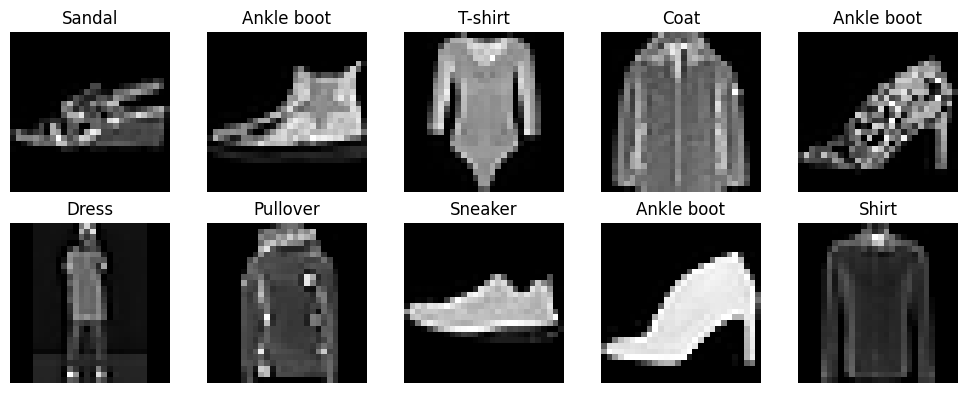

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(imgs[i].numpy().squeeze(), cmap='gray')
    plt.title(f_dataset.text_labels([labels[i]])[0])
    plt.axis('off')
plt.tight_layout()
plt.show()

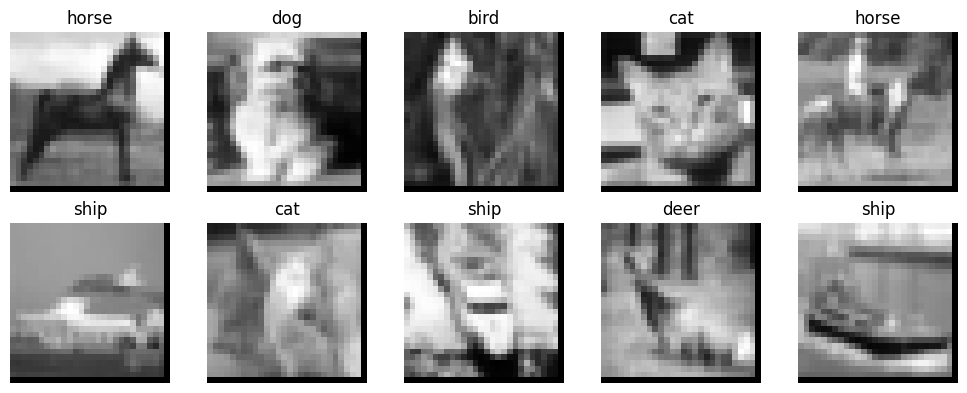

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(imgs2[i].numpy().squeeze(), cmap='gray')
    plt.title(c_dataset.text_labels([labels2[i]])[0])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# Get input shape dynamically from dataset
for X, y in train_ds.take(1):
    input_shape = X.shape[1:]  # (28, 28, 1) for FashionMNIST
    print("Input shape:", input_shape)


Input shape: (28, 28, 1)


# binomial logistic regression on FashionMNIST data using tensorflow

In [7]:
from model_loader import split_large_dataset, LogReg

# Setup
num_classes = 10

## model fitting without early stopping or regularization

In [8]:
log_model = LogReg(input_shape=input_shape, num_classes=num_classes)
log_model.tfLogReg()  # initializes the tf_model inside the class

# Train model on FashionMNIST
hystory1 =  log_model.tf_model.fit(train_ds, epochs=20)



Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7366 - loss: 0.7889
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8387 - loss: 0.4844
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8517 - loss: 0.4476
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8552 - loss: 0.4439
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8602 - loss: 0.4313
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8587 - loss: 0.4328
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8594 - loss: 0.4283
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8598 - loss: 0.4254
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8624 - loss: 0.4247
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8615 - loss: 0.4197
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8603 - loss: 0.4249
Epoch 12/20
1875/1875 ━━━━━━━

Training model without checking for validation loss has the risk of the model being overfitted on training (seen) data and performs poorly on testing (unseen) data. 
Overfitting happens when the model picks up unique patterns present in training data but absent in testing data, so, the model fails to generalize. 

In [9]:
test_loss, test_accuracy = log_model.tf_model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8455 - loss: 0.4589
Test Accuracy: 84.25%


## Early stopping implemented to prevent model overfitting

### heatmap to find regularization strength

In [10]:
train_data, val_data = split_large_dataset(train_ds, val_ratio=0.2, batch_size=f_dataset.batch_size, total_size= len(f_dataset.train_ds[0]))


L2 Sweep:   0%|          | 0/5 [00:00<?, ?it/s]e:\ml-basics\basics-ml\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
L2 Sweep: 100%|██████████| 5/5 [08:04<00:00, 96.90s/it] 


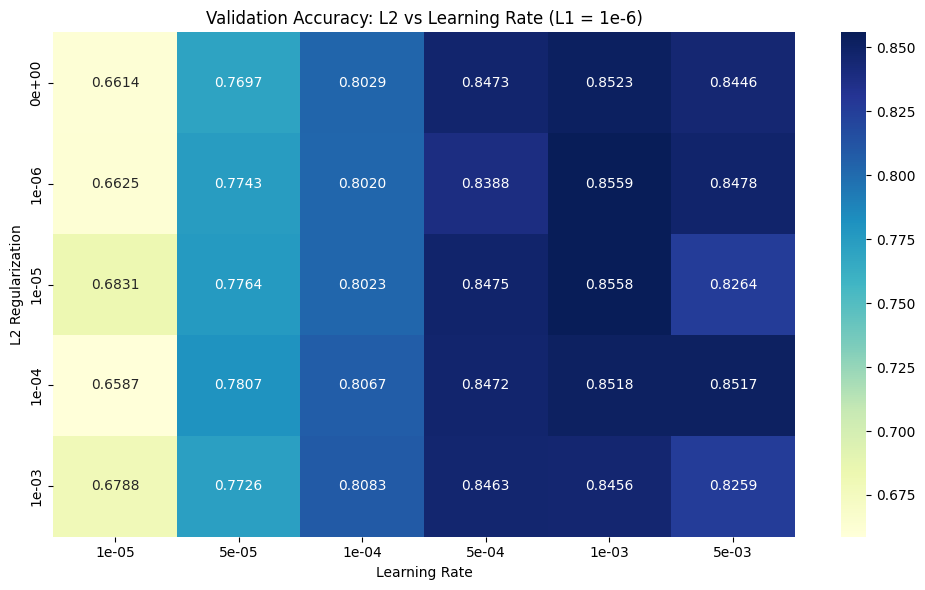

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import regularizers

# Define ranges
#l1_values = [0.0, 1e-6, 1e-5, 1e-4, 1e-3]
l1_fixed = 0
learning_rates = [1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3]
l2_values = [0.0, 1e-6, 1e-5, 1e-4, 1e-3]

# Initialize accuracy matrix
val_accuracies = np.zeros((len(l2_values), len(learning_rates)))

# Sweep
for i, l2 in enumerate(tqdm(l2_values, desc="L2 Sweep")):
    for j, lr in enumerate(learning_rates):
        # Build model
        model = tf.keras.Sequential([
            tf.keras.Input(shape=input_shape),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_classes,
                activation='softmax',
                kernel_regularizer=regularizers.l1_l2(l1=l1_fixed, l2=l2))
        ])

        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

        # Train briefly
        history = model.fit(
            train_data,
            validation_data=val_data,
            epochs=3,
            verbose=0
        )

        val_accuracies[i, j] = history.history['val_accuracy'][-1]

        tf.keras.backend.clear_session()
        tf.keras.backend.clear_session()


# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(val_accuracies, annot=True, fmt=".4f",
            xticklabels=[f"{lr:.0e}" for lr in learning_rates],
            yticklabels=[f"{l2:.0e}" for l2 in l2_values],
            cmap="YlGnBu")
plt.xlabel("Learning Rate")
plt.ylabel("L2 Regularization")
plt.title("Validation Accuracy: L2 vs Learning Rate (L1 = 1e-6)")
plt.tight_layout()
plt.show()


In [26]:
alpha = 0
beta = 1e-2
lr = 1e-3

l1 regularization pushes some weights to exactly 0.
l2 regularization encourages weights smoothly towards nealy 0.

small l2 regularization strength indicates minimal constraint on weights, but has a higher overfitting risk. However, a large regularization strength (1e-2) reduces model capacity, going for a simpler model keeping the overfitting risk low.

### model trained with Regularization to combat overfitting

In [27]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',      # watch validation loss
    patience=5,              # stop if val_loss doesn’t improve for n epochs
    restore_best_weights=True  # load best weights after stop
)


In [28]:
log_model_es = LogReg(input_shape=input_shape, num_classes=num_classes)
log_model_es.tfLogReg(reg_type='elastic', alpha=alpha, beta=beta, learning_rate=lr)  # initializes the tf_model inside the class

train_data, val_data = split_large_dataset(train_ds, val_ratio=0.2, batch_size=f_dataset.batch_size, total_size= len(f_dataset.train_ds[0]))

# Train model on FashionMNIST
history = log_model_es.tf_model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[early_stop]
)

Epoch 1/50
   1456/Unknown 2s 1ms/step - accuracy: 0.7199 - loss: 1.0422

e:\ml-basics\basics-ml\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7217 - loss: 1.0369 - val_accuracy: 0.8148 - val_loss: 0.7666
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8128 - loss: 0.7580 - val_accuracy: 0.8215 - val_loss: 0.7358
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8188 - loss: 0.7394 - val_accuracy: 0.8152 - val_loss: 0.7323
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8152 - loss: 0.7388 - val_accuracy: 0.8226 - val_loss: 0.7231
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8103 - loss: 0.7391 - val_accuracy: 0.8141 - val_loss: 0.7295
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8153 - loss: 0.7286 - val_accuracy: 0.8218 - val_loss: 0.7213
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8141 - loss: 0.7290 - val_accuracy: 0.8176 - val_loss: 0.7225
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8159 - loss: 0.7203 - val_accurac

In [29]:
test_loss, test_accuracy = log_model_es.tf_model.evaluate(test_ds)
print(f"Test Accuracy with early stopping: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8102 - loss: 0.7298
Test Accuracy with early stopping: 80.46%


### deliberately overfitting the model for visualization of the validation loss and training loss

In [16]:
log_model_of = LogReg(input_shape=input_shape, num_classes=num_classes)
log_model_of.tfLogReg()  # initializes the tf_model inside the class

small_train_data, _ = split_large_dataset(train_ds, val_ratio=0.98, batch_size=f_dataset.batch_size, total_size= len(f_dataset.train_ds[0]))

# Train model on FashionMNIST
history_of = log_model_of.tf_model.fit(
    small_train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[] #no early stopping
)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.3522 - loss: 1.9079 - val_accuracy: 0.6390 - val_loss: 1.1862
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.6786 - loss: 1.0633 - val_accuracy: 0.6784 - val_loss: 0.9368
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.6896 - loss: 0.9118 - val_accuracy: 0.7182 - val_loss: 0.8560
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.7084 - loss: 0.8731 - val_accuracy: 0.7279 - val_loss: 0.7842
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.7454 - loss: 0.7424 - val_accuracy: 0.7558 - val_loss: 0.7281
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.7386 - loss: 0.7202 - val_accuracy: 0.7629 - val_loss: 0.7083
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.7730 - loss: 0.6834 - val_accuracy: 0.7705 - val_loss: 0.6931
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.7680 - loss: 0.6988 - val_accuracy: 0.7709 - v

### plotting the overfit model and the model trained with penalty

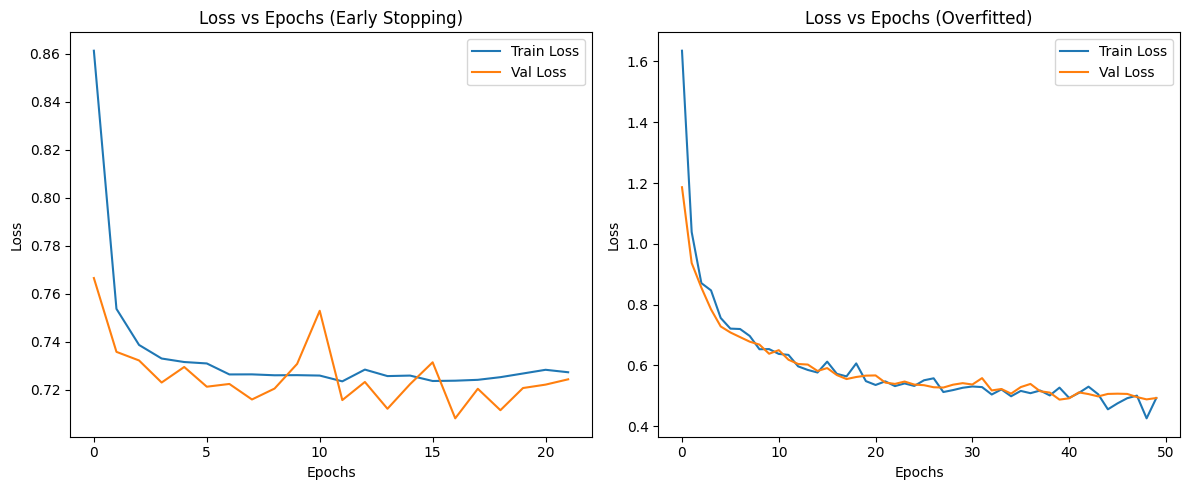

In [30]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot 1: Trained with Early Stopping
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Val Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss vs Epochs (Early Stopping)')
axes[0].legend()

# Plot 2: Overfitted
axes[1].plot(history_of.history['loss'], label='Train Loss')
axes[1].plot(history_of.history['val_loss'], label='Val Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].set_title('Loss vs Epochs (Overfitted)')
axes[1].legend()

plt.tight_layout()  # Auto-adjust spacing between plots
plt.show()


In [31]:
test_loss1, test_accuracy1 = log_model_of.tf_model.evaluate(test_ds)
print(f"Test Accuracy of Overfitted model: {test_accuracy1 * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8284 - loss: 0.5102
Test Accuracy of Overfitted model: 82.30%


# plotting loss surface

In [32]:
w, b = log_model_es.tf_model.layers[1].get_weights()
print("W shape", w.shape)
print("b shape", b.shape)

W shape (784, 10)
b shape (10,)


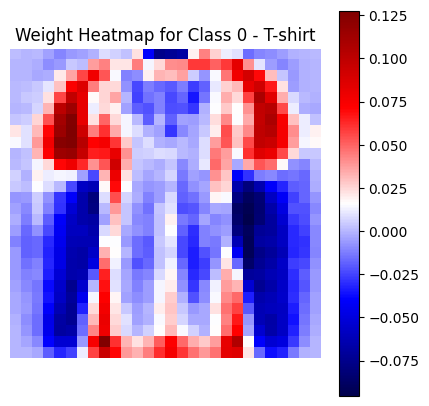

In [33]:
# Choose a class index — for FashionMNIST, let's use 0 = 'T-shirt/top'
cls_idx = 0

# Assume your weight matrix is shaped (784, 10)
# We'll visualize the weights for one class
weight_for_class = w[:, cls_idx].reshape(28, 28)

plt.figure(figsize=(5, 5))
plt.imshow(weight_for_class, cmap='seismic', interpolation='nearest')
plt.colorbar()
plt.title(f'Weight Heatmap for Class {cls_idx} - {f_dataset.text_labels([cls_idx])[0]}')
plt.axis('off')
plt.show()


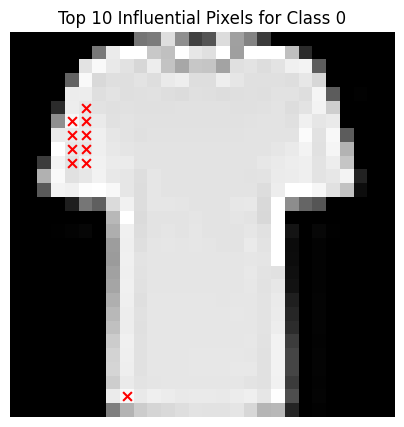

In [34]:
# Get the most "influential" input pixels for this class
flat_weights = w[:, cls_idx]
top_indices = np.argsort(np.abs(flat_weights))[-10:]  # top 10

# Convert those to (row, col) positions
coords = [(idx // 28, idx % 28) for idx in top_indices]

# Grab one image to overlay onto
for im,tr in train_ds.unbatch():
    if tr.numpy()==0:
        sample_image = im.numpy().squeeze()  # (28, 28)
        break

plt.figure(figsize=(5, 5))
plt.imshow(sample_image, cmap='gray')
plt.title('Top 10 Influential Pixels for Class 0')
for r, c in coords:
    plt.scatter(c, r, c='red', s=40, marker='x')
plt.axis('off')
plt.show()


In [37]:
top_indices

array([172, 145, 256, 200, 257, 228, 229, 736, 173, 201])

In [35]:
from loss_surface_plotting import PlotLoss

plot = PlotLoss(log_model_es, train_data)

X,Y,Z = plot.calculateLoss()

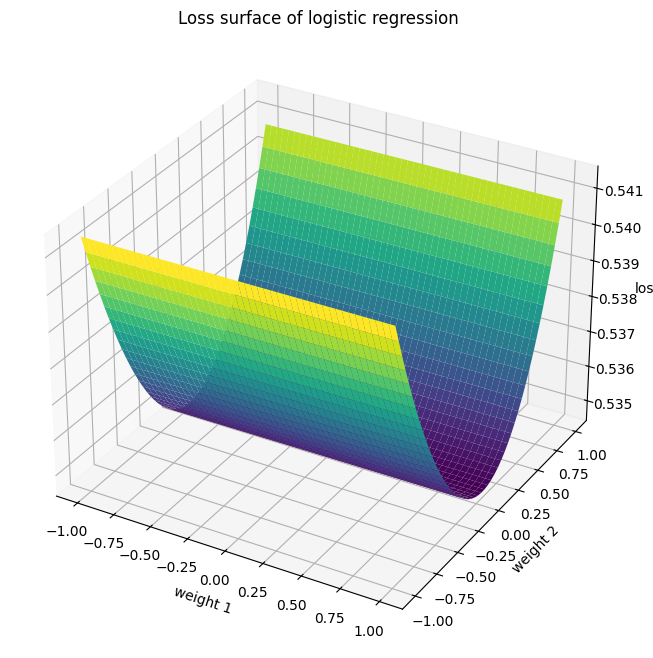

In [36]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X,Y,Z, cmap = 'viridis')
ax.set_xlabel('weight 1')
ax.set_ylabel('weight 2')
ax.set_zlabel('loss')
ax.set_title('Loss surface of logistic regression')
plt.show()


a smooth and bowl shaped loss surface (convex surface) would indicate a single global minima, so, SGD can easily find this point without getting stuck on local minima, which leads to easy optimization.
Whereas, a rugged and sharp loss surface might indicate that the model struggles to optimize.

# sklearn version

In [24]:
import tensorflow as tf
import numpy as np


# Unbatch and flatten images for scikit-learn
X_flat = []
y_flat = []

for X_batch, y_batch in train_ds.unbatch().take(10000):  # take a subset for faster training
    X_flat.append(tf.reshape(X_batch, [-1]))
    y_flat.append(y_batch)


X_flat = np.stack(X_flat)
y_flat = np.array(y_flat)

# Train scikit-learn model
log_model.skLogReg()
log_model.sk_model.fit(X_flat, y_flat)

print("Training complete. Best C:", log_model.sk_model.C_)
print("Train accuracy:", log_model.sk_model.score(X_flat, y_flat))


e:\ml-basics\basics-ml\Lib\site-packages\sklearn\linear_model\_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training complete. Best C: [0.04641589 0.04641589 0.04641589 0.04641589 0.04641589 0.04641589
 0.04641589 0.04641589 0.04641589 0.04641589]
Train accuracy: 0.8741


In [25]:
import tensorflow as tf
import numpy as np


# Unbatch and flatten images for scikit-learn
X_flat = []
y_flat = []

for X_batch, y_batch in test_ds.unbatch().take(10000):  # take a subset for faster training
    X_flat.append(tf.reshape(X_batch, [-1]))
    y_flat.append(y_batch)


X_flat = np.stack(X_flat)
y_flat = np.array(y_flat)

print("Test accuracy:", log_model.sk_model.score(X_flat, y_flat))


Test accuracy: 0.8296
